# Task :Classification of Amazon-Reviews into two categories (Positive or Negative) Using Decision-Tree

About Dataset : Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

**The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon:**

    Number of reviews: 568,454  
    Number of users: 256,059
    Number of products: 74,258
    Timespan: Oct 1999 - Oct 2012
    Number of Attributes/Columns in data: 10


**Attribute Information:**

    1) ProductId - unique identifier for the product
    2) UserId - unqiue identifier for the user
    3) ProfileName -Profile name of the customer
    4) HelpfulnessNumerator - number of users who found the review helpful
    5) HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
    6) Score - rating between 1 and 5
    7) Time - timestamp for the review
    8) Summary - brief summary of the review
    9) Text - text of the review


**Note :**

Here we are purposefully ignoring reviews with score equals to 3 as there are Neutral , and if the score is above 3 then the review will be set to "Positive" , otherwise it will be set to "Negative". Text is already pre-processed by removing html tags ,duplicate entries, stopwords and punctuations. Only first 100000 data points(most recent based on time) are taken for this exercise.

**Reviews will be converted into Vector Representations like :**

    1)Bag of words
    2)TF-IDF
    3)AvgW2Vec
    4)TF-IDF Weighted W2Vec



In [8]:
#importing required libraries
%matplotlib inline
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

#importing required data into pandas dataframe
amazon_data = pd.read_csv("amazon_reviews_final.csv")

## Spliting data based on time


In [2]:
#taking first 70% data_points as training data and rest as test_data
train = amazon_data.iloc[0:int(len(amazon_data)*0.7),:]
test = amazon_data.iloc[int(len(amazon_data)*0.7):int(len(amazon_data)),:]

train_text = train["Text"]
test_text = test["Text"]

## Bag of words

In [41]:
#importing required library
from sklearn.feature_extraction.text import CountVectorizer

#initializing countvecotrizer and we are using bi_grams to secure the sequence information
amazon_bi = CountVectorizer(ngram_range =(1,2) ,analyzer ="word", min_df = 10 ,max_features = None)
amazon_bi.fit(train_text)
features1 =amazon_bi.get_feature_names()


#getting training and test data
X_train_bow = amazon_bi.transform(train_text)
X_test_bow = amazon_bi.transform(test_text)
y_train =   train["Score"]
y_test =   test["Score"]
y_test.reset_index(inplace=True ,drop =True)

## TF-IDF

In [12]:
#importing required libraries
from sklearn.feature_extraction.text import TfidfVectorizer

#initializing tfidfvectorizer 
dt_tfidf = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), norm='l2' ,min_df = 10)
dt_tfidf.fit(train_text)
features2 = dt_tfidf.get_feature_names()
X_train_tfidf = dt_tfidf.transform(train_text)
X_test_tfidf = dt_tfidf.transform(test_text)
y_train = train["Score"]
y_test = test["Score"]
y_test.reset_index(inplace=True ,drop =True)


## AvgW2Vec

In [5]:
#training and test data
avgw2vec_train = pd.read_csv('Amazon_avgw2vec_train.csv')
avgw2vec_test =pd.read_csv("Amazon_avgw2vec_test.csv")

X_train_avgw2vec = avgw2vec_train.drop("Score" ,axis =1)
X_test_avgw2vec = avgw2vec_test.drop("Score",axis =1)
y_train = avgw2vec_train["Score"]
y_test = avgw2vec_test["Score"]

## TF-IDF weighted Word2Vec

In [6]:
#training and test data
tfidfw2vec_train = pd.read_csv("Amazon_tfidfw2vec_train.csv")
tfidfw2vec_test =pd.read_csv("Amazon_tfidfw2vec_test.csv")

X_train_tfidfw2vec = tfidfw2vec_train.drop("Score" ,axis =1)
X_test_tfidfw2vec = tfidfw2vec_test.drop("Score",axis =1)
y_train = tfidfw2vec_train["Score"]
y_test = tfidfw2vec_test["Score"]

## computing optimal depth for tree using 10-fold corss-validation

In [8]:

#finding the optimal depth_value
depth_list = list(range(1,20))

cv_scores_bow = []
cv_scores_tfidf = []
cv_scores_avgw2vec = []
cv_scores_tfidfw2vec = []


#performing 10-fold cross_validation to find optimal -depth value

#perform 10-fold cross validation
for d in depth_list:
    tree_clf = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=d,max_features="auto", min_samples_leaf=50,splitter='best')
    scores_bow = cross_val_score(tree_clf, X_train_bow, y_train, cv=10, scoring='accuracy')
    scores_tfidf = cross_val_score(tree_clf, X_train_tfidf, y_train, cv=10, scoring='accuracy')
    scores_avgw2vec = cross_val_score(tree_clf, X_train_avgw2vec, y_train, cv=10, scoring='accuracy')
    scores_tfidfw2vec = cross_val_score(tree_clf, X_train_tfidfw2vec, y_train, cv=10, scoring='accuracy')
    cv_scores_bow.append((scores_bow.mean())*100)
    cv_scores_tfidf.append((scores_tfidf.mean())*100)
    cv_scores_avgw2vec.append((scores_avgw2vec.mean())*100)
    cv_scores_tfidfw2vec.append((scores_tfidfw2vec.mean())*100)
    

## Visualiation for Optimlal-depth of TREE  for each Vector Representation

for  Bag of words
the optimal value for depth of the tree is 4:


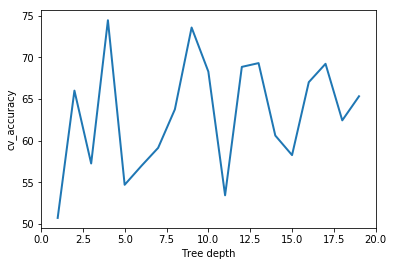

for  TF-IDF
the optimal value for depth of the tree is 11:


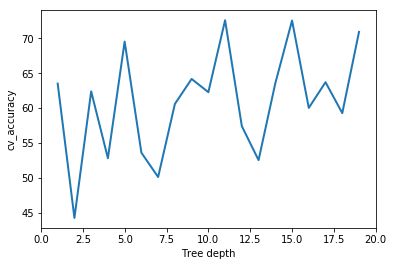

for  Avgw2vec
the optimal value for depth of the tree is 17:


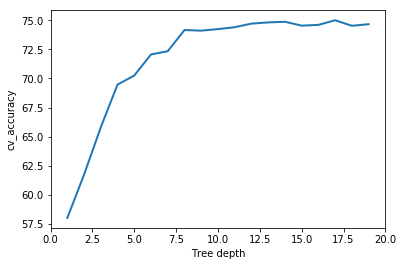

for  TF-IDF weighted W2vec
the optimal value for depth of the tree is 16:


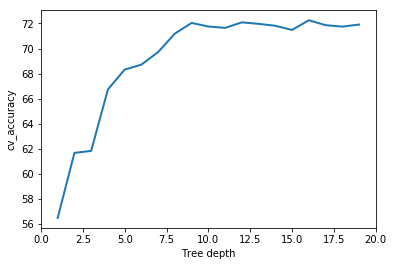

In [9]:
#plot between cv_scores and depth_values
optimal_depth_list =[]
order_list =[0,1,2,3]
vect_rep = ["Bag of words","TF-IDF" ,"Avgw2vec" , "TF-IDF weighted W2vec"]
vect_score= [cv_scores_bow ,cv_scores_tfidf,cv_scores_avgw2vec ,cv_scores_tfidfw2vec]
for i in order_list:
    plt.plot(depth_list , vect_score[i]  ,linewidth = 2.0 , linestyle="-")
    plt.xlim(0,20)
    plt.ylabel("cv_accuracy")
    plt.xlabel("Tree depth")
    optimal_depth = depth_list[vect_score[i].index(max(vect_score[i]))]
    optimal_depth_list.append(optimal_depth)
    print("for " ,vect_rep[i])
    print("the optimal value for depth of the tree is {}:".format(optimal_depth))
    plt.show() 
    i+=1
    


## Computing All required Metrics for each Vector Representation 

In [10]:
#getting precision,recall,f1-score 
#Import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



def confusion_matrix_values(m, n):
    cm = confusion_matrix(m, n)
    return(cm[0][0], cm[0][1],
            cm[1][0], cm[1][1]) 


#initializing Decision tree with optimal depth value
order_list =[0,1,2,3]
train_list = [X_train_bow,X_train_tfidf,X_train_avgw2vec,X_train_tfidfw2vec]
test_list = [X_test_bow,X_test_tfidf,X_test_avgw2vec,X_test_tfidfw2vec]

accuracy_list = [];
test_error_list = [];
train_error_list = [];
precision_list =[];
recall_list =[];
f1_score_list =[];

for i in order_list:
    dt_clf = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth= optimal_depth_list[i],max_features="auto", min_samples_leaf=50,splitter='best')
    #fitting the DT model
    dt_clf.fit(train_list[i],y_train)
    #predicting for test_data 
    dt_pred = dt_clf.predict(test_list[i])
    #predicting for train_data
    dt_train_pred = dt_clf.predict(train_list[i])
    print("##################################################################################################")
    #computing accuracy on test_data 
    
    print("for " ,vect_rep[i])
    acc_test = accuracy_score(y_test,dt_pred)*100
    print("test accuracy using DecisionTree : {0:.2f}%" .format(round(acc_test,2)))  
    accuracy_list.append(round(acc_test,2))
    test_error = (100-acc_test)
    print("test error using DecisionTree  : {0:.2f}%" .format(round(test_error,2)))
    test_error_list.append(round(test_error,2))
    train_error =( 1-accuracy_score(y_train,dt_train_pred))*100
    print("train error using DecisionTree  : {0:.2f}%" .format(round(train_error,2)))
    train_error_list.append(round(train_error,2))
    precision = precision_score(y_test,dt_pred)*100
    print("precision score using DT classifier is : {0:.2f}%".format(round(precision,2)))
    precision_list.append(precision)
    recall= recall_score(y_test,dt_pred)*100
    print("Recall score using DT classifier is : {0:.2f}%" .format(round(recall,2)))    
    recall_list.append(recall)
    f1score = f1_score(y_test,dt_pred)*100
    print("F1-score using DT classifier is : {0:.2f}%".format(round(f1score,2)))
    f1_score_list.append(f1score)
    TN, FN, FP, TP = confusion_matrix_values(y_test, dt_pred)
    print('True positive = {}'.format(TP))
    print('False positive = {}'.format(FP))
    print('False negative = {}'.format(FN))
    print('True negative = {}'.format(TN))
    i+=1
    



##################################################################################################
for  Bag of words
test accuracy using DecisionTree : 26.07%
test error using DecisionTree  : 73.93%
train error using DecisionTree  : 75.06%
precision score using DT classifier is : 92.81%
Recall score using DT classifier is : 10.84%
F1-score using DT classifier is : 19.41%
True positive = 2671
False positive = 21972
False negative = 207
True negative = 5150
##################################################################################################
for  TF-IDF
test accuracy using DecisionTree : 65.83%
test error using DecisionTree  : 34.17%
train error using DecisionTree  : 32.46%
precision score using DT classifier is : 89.08%
Recall score using DT classifier is : 66.55%
F1-score using DT classifier is : 76.19%
True positive = 16401
False positive = 8242
False negative = 2010
True negative = 3347
#####################################################################################

## Important features and Visualization of Decision-Tree

In [38]:
order_list =[0,1]
optimal_depth_list =[4,11]
vect_rep = ["Bag of words","TF-IDF" ]
train_list = [X_train_bow,X_train_tfidf]
test_list = [X_test_bow,X_test_tfidf]

for i in order_list:
    dt_clf = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth= optimal_depth_list[i],max_features="auto", min_samples_leaf=50,splitter='best')
    #fitting the DT model
    dt_clf.fit(train_list[i],y_train)
    #predicting for test_data 
    dt_pred = dt_clf.predict(test_list[i])
  
    print("##################################################################################################")
    feat_importances = pd.DataFrame(np.column_stack((features1,dt_clf.feature_importances_)) )
    sort_by_feat_imp = feat_importances.sort_values(1,ascending=False)
    top_10 = (sort_by_feat_imp.head(10))
    top_10.columns = ["feature" , "value"]
    print(top_10)
    
   
    
    
  

   

##################################################################################################
           feature                   value
25947          not      0.7333057567232663
24368        money     0.15870259379590446
26355  not purchas    0.035781045795481366
3170         bewar     0.03266647460494478
36615        subtl    0.014747541153884217
5069          call    0.014494738450983155
33744         sent    0.009519507366033922
39063      thought  0.00048343308610335813
34695        small  0.00019024250337134114
19548         item  0.00010866652002725104
##################################################################################################
            feature                 value
40536      unfortun   0.23102299413427813
38552         thank   0.13260628590303822
17209    great tast   0.12504115556827075
25496         never   0.09110691768051893
9218    definit not   0.08393680936102146
26198     not happi   0.08089611534277708
40591       unpleas   0.05927334579

for Bag of words


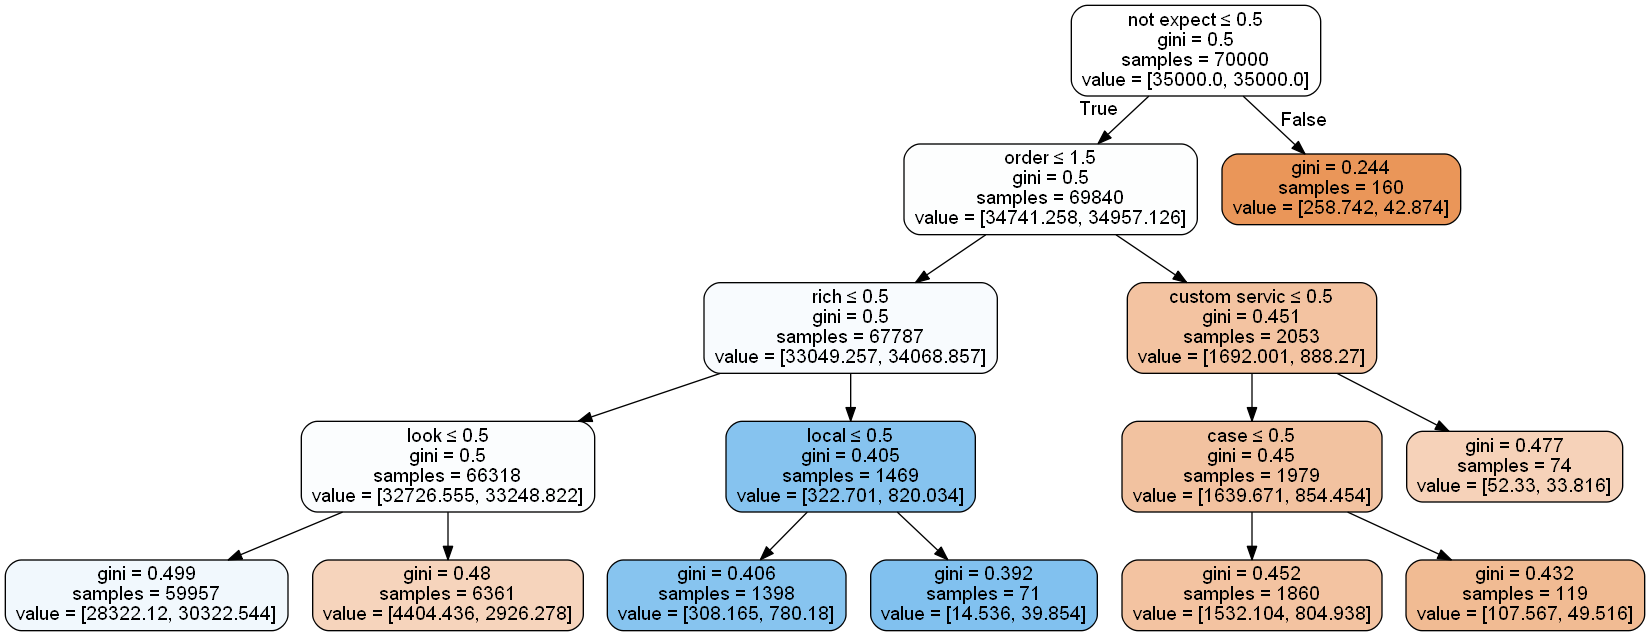

In [42]:
#importing required libraries
from sklearn.externals.six import StringIO  
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus



dot_data = StringIO()
dt_clf = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth= 4,max_features="auto", min_samples_leaf=50,splitter='best')
#fitting the DT model
dt_clf.fit(X_train_bow,y_train)
print("for Bag of words")
export_graphviz(dt_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features1)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
    



for TF-IDF


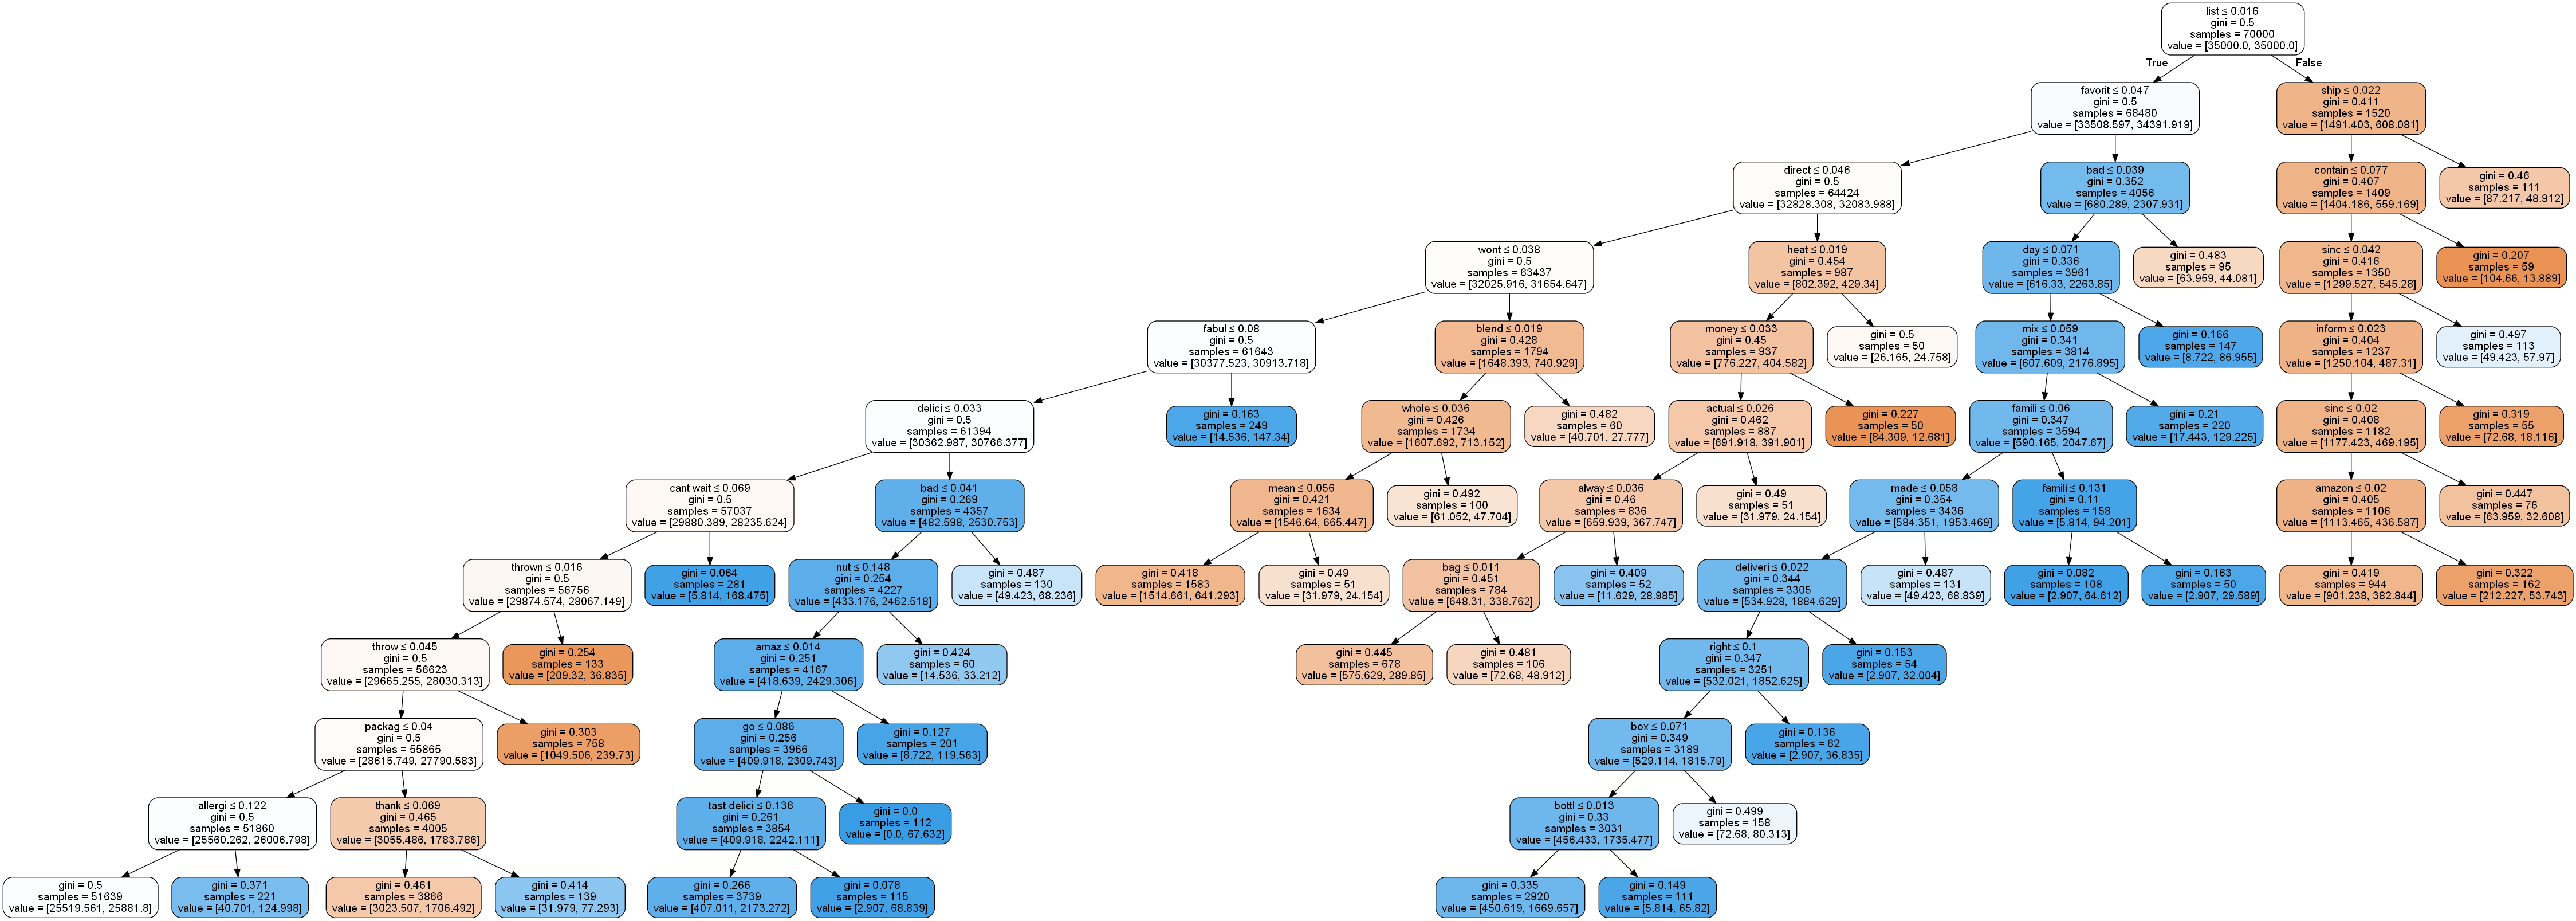

In [43]:
dot_data = StringIO()
dt_clf = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth= 11,max_features="auto", min_samples_leaf=50,splitter='best')
#fitting the DT model
dt_clf.fit(X_train_tfidf,y_train)
print("for TF-IDF")
export_graphviz(dt_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
        

## Conclusions:

In [14]:
#reporting the results in a table
from prettytable import PrettyTable


for i in order_list:
    t= PrettyTable()

    t.field_names =["metric/Parameter" , "result"]

    t.add_row (["Model" ,"Classification"])
    t.add_row (["Classifier" ,"Decision-Tree"])
    t.add_row(["Vector-Representation",vect_rep[i]])
    t.add_row  (["Optimal_depth" , optimal_depth_list[i]])
    t.add_row(["test accuracy" ,round(accuracy_list[i],2)])
    t.add_row (["Train_error" ,round(train_error_list[i],2)])
    t.add_row (["Test error" , round(test_error_list[i],2)])

    print(t)
    
    
    
test_error_list = [];
train_error_list = [];

+-----------------------+----------------+
|    metric/Parameter   |     result     |
+-----------------------+----------------+
|         Model         | Classification |
|       Classifier      | Decision-Tree  |
| Vector-Representation |  Bag of words  |
|     Optimal_depth     |       4        |
|     test accuracy     |     26.07      |
|      Train_error      |     75.06      |
|       Test error      |     73.93      |
+-----------------------+----------------+
+-----------------------+----------------+
|    metric/Parameter   |     result     |
+-----------------------+----------------+
|         Model         | Classification |
|       Classifier      | Decision-Tree  |
| Vector-Representation |     TF-IDF     |
|     Optimal_depth     |       11       |
|     test accuracy     |     65.83      |
|      Train_error      |     32.46      |
|       Test error      |     34.17      |
+-----------------------+----------------+
+-----------------------+----------------+
|    metric